In [1]:
!pip3 install torch torchvision torchaudio

  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/3f/6f/79fe2cb91908b3d3a57b8ef68911123f797c0fb05a268a6da86cc5a67484/torchaudio-2.2.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/8d/23/285f4566c0ab1c0499f88bbfa69d896a3546ed757f177b829a9fd4fac28f/torchaudio-2.2.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/79/f7/5929802a1d14693d2dea6e60c51a923724348f134a91558f22bc686d3d8b/torchaudio-2.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/42/e6/cd2386ff0bb1476c472593a77ca1870cbbddef901e63b04cc84ccd368da7/torchaudio-2.1.2-cp311-cp

In [2]:
!pip install img2vec_pytorch

  Obtaining dependency information for img2vec_pytorch from https://files.pythonhosted.org/packages/8a/12/30eba1aa241abf034b7dfc4f76c7b95f9d0bc8fa374fc4d69fb4f095e0be/img2vec_pytorch-1.0.1-py3-none-any.whl.metadata


In [3]:
import torch

import numpy as np
import pandas as pd
import os

In [4]:
dataset = pd.read_csv('/Users/saptarshimondal/Documents/1.Course_Materials_MSDS/2nd SEM/CSCE 670 ISR/3.Project/MFlix-RecommenderSystem/src/mflix-app/static/Movies_data3200.csv')
dataset.sample(2)

movieId   imdbId  tmdbId                     title original_language  \
2974   171141  5016946  412202            Handsome Devil                en   
2213   137250  2664080  171648  Itâ€™s Only Make Believe                no   

                                               overview  popularity   budget  \
2974  A music-mad 16-year-old outcast at a rugby-mad...   16.112052  1050000   
2213  After serving 10 years in prison for murder, J...    0.697558        0   

                             genres  \
2974  [{'id': 18, 'name': 'Drama'}]   
2213  [{'id': 18, 'name': 'Drama'}]   

                                   production_companies  ... release_date  \
2974  [{'name': 'Treasure Entertainment', 'id': 21872}]  ...   2017-02-15   
2213               [{'name': 'Chezville', 'id': 35212}]  ...   2013-03-22   

     revenue  runtime                          spoken_languages vote_average  \
2974       0       95  [{'iso_639_1': 'en', 'name': 'English'}]          7.3   
2213       0       91    [{'iso_639_1': 'no', 'name': 'Norsk'}]          6.0   

      vote_count                                           keywords  \
2974          81  [{'id': 236903, 'name': 'homosexualidad'}, {'i...   
2213           4                    [{'id': 378, 'name': 'prison'}]   

                                                   cast  \
2974  [{'cast_id': 1, 'character': 'Conor', 'credit_...   
2213  [{'cast_id': 6, 'character': 'Jenny', 'credit_...   

                                                   crew  \
2974  [{'credit_id': '57bb19f7c3a36836390069ab', 'de...   
2213  [{'credit_id': '52fe4d10c3a36847f824cb97', 'de...   

                                     poster_working_url  
2974  https://image.tmdb.org/t/p/w500/xlHOWQFgcGV4Kc...  
2213  https://image.tmdb.org/t/p/w500/oL2OHJslshP2Wr...  

[2 rows x 21 columns]

In [71]:
from img2vec_pytorch import Img2Vec
from PIL import Image

def get_vec(img_filename):
    # Initialize Img2Vec with GPU
    img2vec = Img2Vec(cuda=False, model='resnet-18', layer_output_size=512)

    # Read in an image (rgb format)
    img = Image.open(img_filename)
    rgb_img = img.convert("RGB") 
    # Get a vector from img2vec, returned as a torch FloatTensor
    vec = img2vec.get_vec(rgb_img, tensor=True)
    # Or submit a list
    # vectors = img2vec.get_vec(list_of_PIL_images)

    return vec

In [72]:
import glob
from tqdm import tqdm 

image_list = glob.glob("/Users/saptarshimondal/Documents/1.Course_Materials_MSDS/2nd SEM/CSCE 670 ISR/3.Project/MFlix-RecommenderSystem/src/data/iMAGES/*")

image_vector_dict = {}
fails = []
n_fails = 0
for img_name in tqdm(image_list):
    try:
    # Extract the filename part
        filename_part = img_name.split('/')[-1].split('.')[0]
    
    # Check if the extracted part is non-empty
        if filename_part:
            image_vector_dict[int(filename_part)] = get_vec(img_name).squeeze()
        else:
        # Handle the case where the filename part is empty
            print("Invalid filename:", img_name)
    except:
    # Handle the case where conversion to integer fails
        print("Failed to convert to integer:", img_name)
        fails.append(img_name)
        n_fails += 1
        continue
print("Task completed. No of failures = {}".format(n_fails))

  0%|          | 0/3200 [00:00<?, ?it/s]

/Users/saptarshimondal/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/saptarshimondal/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3200/3200 [09:41<00:00,  5.50it/s]

Task completed. No of failures = 0


In [108]:
for key in image_vector_dict:
    print(key)

150995
823
144738
52106
8377
116042
105980
112224
82680
8388
167644
163422
124769
5860
134208
7939
5690
133229
7093
67624
134234
3593
143527
4767
3008
2316
104644
146477
8613
85312
175903
122683
87511
161962
119601
1623
3034
137517
360
132335
122898
6825
145817
172705
31660
32369
110779
175693
1019
170927
8997
599
139499
153126
175687
4613
42705
175877
45730
6986
53152
8015
72822
3140
94419
132296
135512
26240
112807
3829
566
172117
162304
173209
160275
71867
2074
91993
160088
7118
152984
95539
144880
132916
144658
92518
81564
1233
130668
125503
173745
167042
26730
105837
27360
124621
3395
5096
149382
2920
136542
126751
98949
171609
174017
143687
171153
122286
154476
8202
7131
140371
146700
115364
122721
120136
169250
8969
25774
215
169244
159387
117956
99855
171423
86785
83825
74275
168614
74261
25990
34645
108692
170729
6987
110036
2539
3627
4148
77783
3141
91560
116321
110744
8766
6005
2263
143446
115166
65556
170113
125884
174407
171557
151687
142823
171225
145180
168012
6818
95672

In [118]:
import torch.nn.functional as F
ids = len(np.unique(list(image_vector_dict)))
from tqdm import tqdm

similarity = {}  # Creating an empty dictionary to store similarity values
for key in tqdm(image_vector_dict, desc="Calculating Similarity"):  # Iterating through each key with tqdm
    similarity[key] = {  # Assigning a nested dictionary to similarity with key as the outer key
        img: F.cosine_similarity(image_vector_dict[key], vector, dim=0).item()  # Calculating cosine similarity between vectors
        for img, vector in image_vector_dict.items() if img != key  # Iterating through image_vector_dict excluding the current key
    }

#     sorted_similarity = dict(sorted(similarity.items(), key=lambda item: item[1], reverse=True))

# from IPython.display import display
# list_ = list(sorted_similarity)[1:6]
# for i in list_:
#     path = f"/Users/saptarshimondal/Documents/1.Course_Materials_MSDS/2nd SEM/CSCE 670 ISR/3.Project/MFlix-RecommenderSystem/src/data/iMAGES/{i}.jpg"
#     img = Image.open(path)
#     display(img) 

    
    


Calculating Similarity:   0%|          | 0/3200 [00:00<?, ?it/s]

Calculating Similarity: 100%|██████████| 3200/3200 [01:05<00:00, 48.75it/s]


In [120]:
sorted_similairty = {}
for key in similarity:
    temp_dict = dict(sorted(similarity[key].items(), key=lambda item: item[1], reverse=True))
    top5 = list(temp_dict)[1:6]
    sorted_similairty[key] = top5

In [125]:
sorted_similairty[176041]

[149106, 142905, 116684, 2021, 26629]

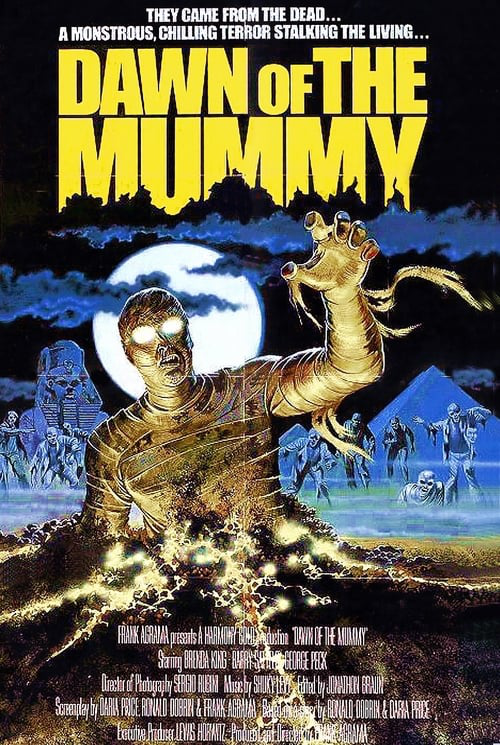

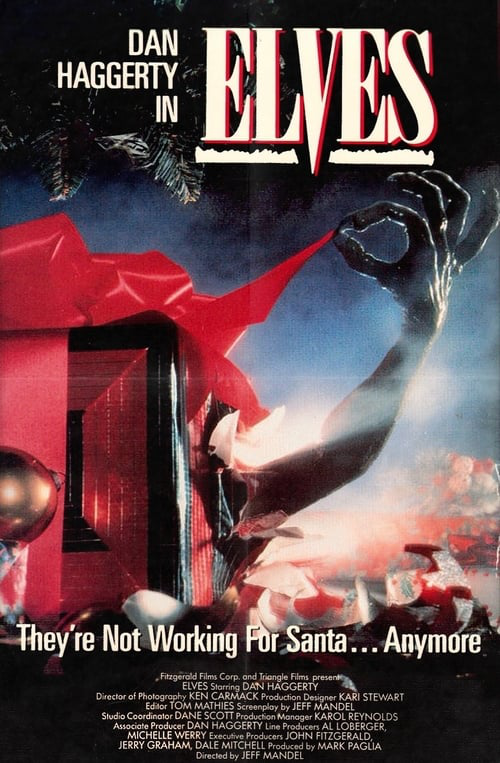

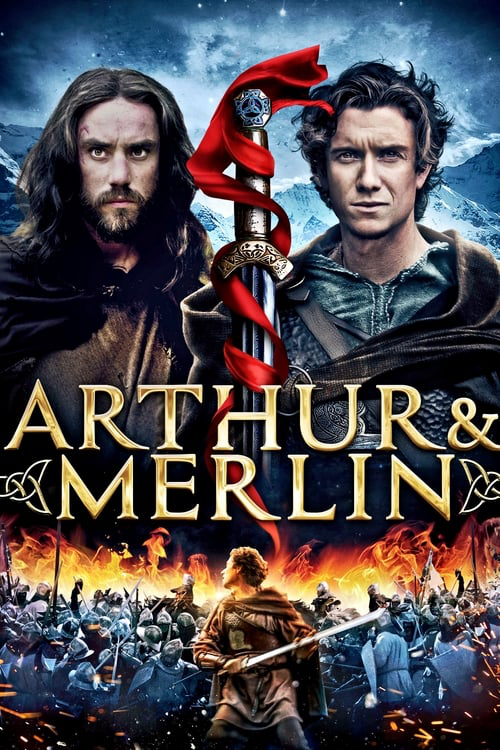

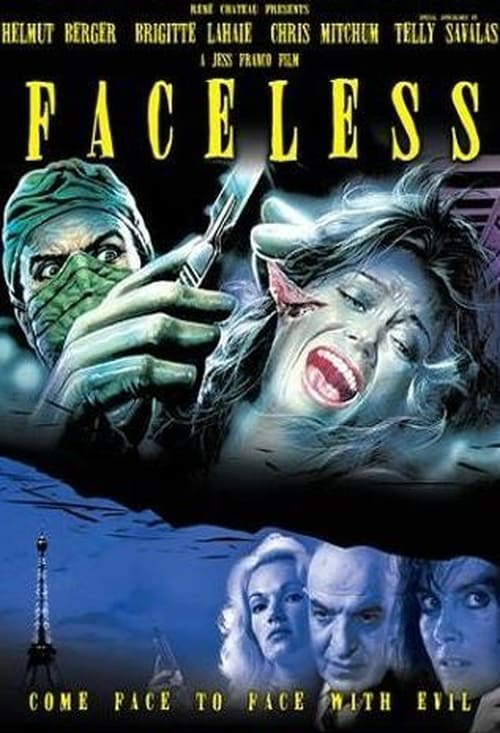

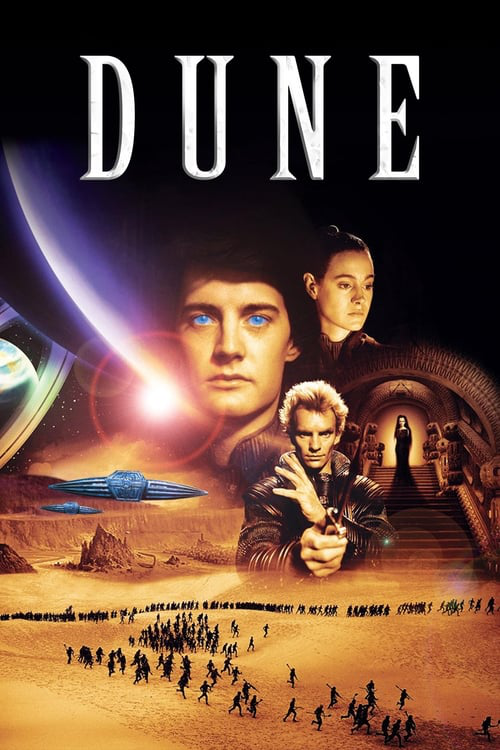

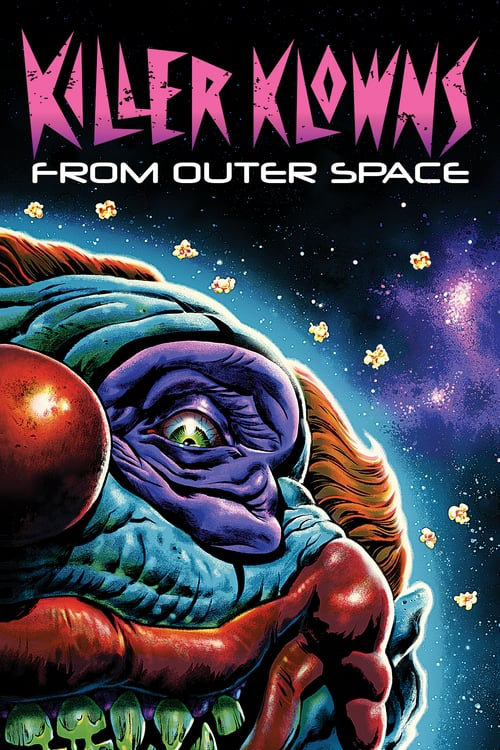

In [126]:
list_ = [176041, 149106, 142905, 116684, 2021, 26629]
path = '/Users/saptarshimondal/Documents/1.Course_Materials_MSDS/2nd SEM/CSCE 670 ISR/3.Project/MFlix-RecommenderSystem/src/data/iMAGES'
for i in list_:
    img = Image.open(str(path +f'/{i}.jpg'))
    display(img)